First 5 rows of the dataset:
   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000           0.00           1.00     64.00    24.314665   
1       0.053865         103.21           6.33     64.64  2383.903686   
2       0.000000           0.74           1.05     63.95    47.849856   
3       0.000000          54.44           6.00     64.00     2.905479   
4       0.000000          54.36           6.11     64.64     3.862227   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0    24.314665    0.0              0.0              0.0              0.0  ...   
1  2383.903686    0.0              1.0              0.0              1.0  ...   
2    47.849856    0.0              0.0              0.0              0.0  ...   
3     2.905479    0.0              0.0              1.0              0.0  ...   
4     3.862227    0.0              0.0              1.0              0.0  ...   

          Std  Tot size           IAT  Number

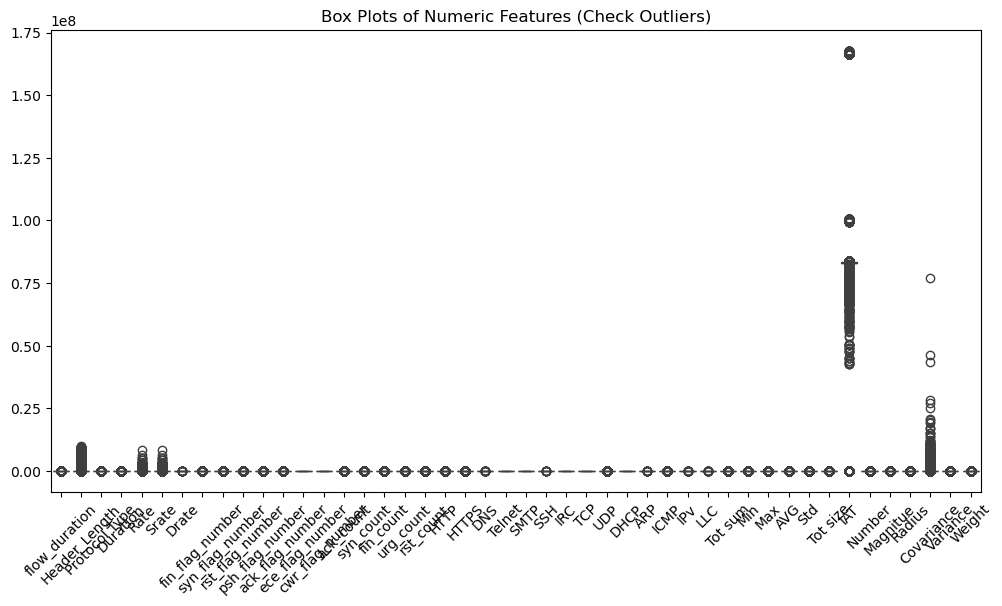


Descriptive Statistics:
       flow_duration  Header_Length  Protocol Type       Duration  \
count  223401.000000   2.234010e+05  223401.000000  223401.000000   
mean        5.479095   7.665669e+04       9.098613      66.390409   
std       251.180381   4.588708e+05       8.976783      14.299433   
min         0.000000   0.000000e+00       0.000000       0.000000   
25%         0.000000   5.400000e+01       6.000000      64.000000   
50%         0.000000   5.400000e+01       6.000000      64.000000   
75%         0.105420   2.863000e+02      14.970000      64.000000   
max     53660.127253   9.771199e+06      47.000000     255.000000   

               Rate         Srate          Drate  fin_flag_number  \
count  2.234010e+05  2.234010e+05  223401.000000    223401.000000   
mean   9.184128e+03  9.184128e+03       0.000003         0.086759   
std    1.008635e+05  1.008635e+05       0.000929         0.281482   
min    0.000000e+00  0.000000e+00       0.000000         0.000000   
25%    2

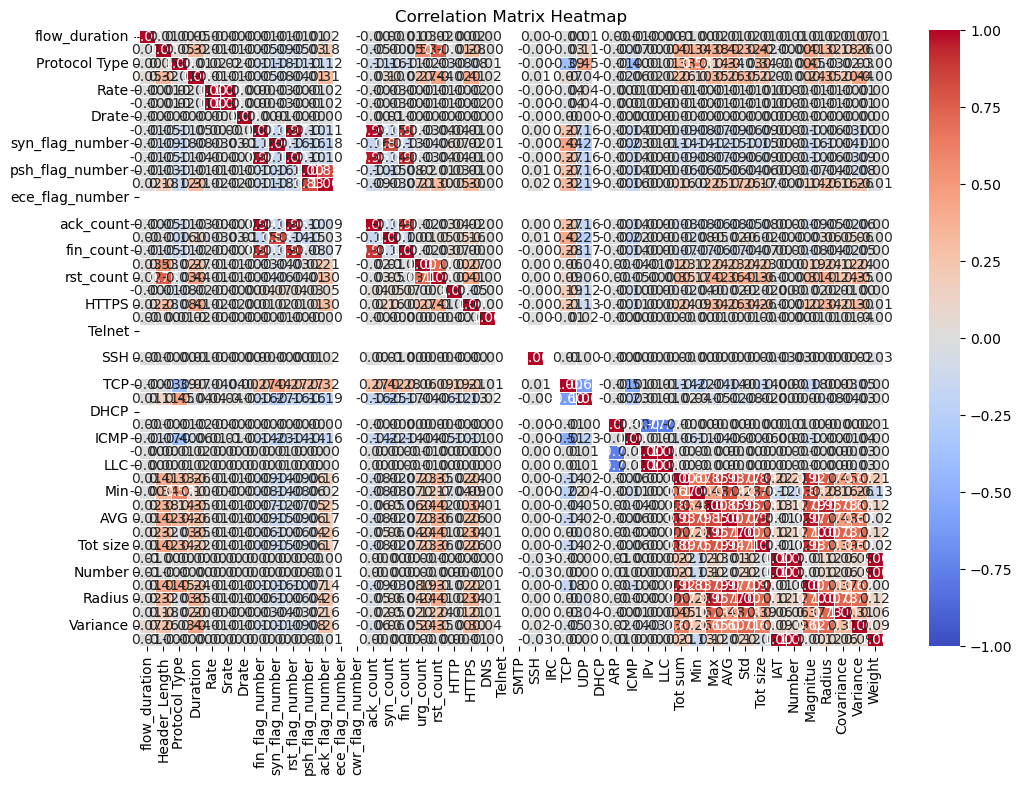

In [1]:
# Box plots for numeric columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'cicio2023.csv' with your file path)
df = pd.read_csv('C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-00021-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Check basic info (columns, data types, non-null counts)
print("\nDataset info:")
print(df.info())

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Box Plots of Numeric Features (Check Outliers)')
plt.xticks(rotation=45)
plt.show()
# Basic statistics (mean, std, quartiles, min, max)
print("\nDescriptive Statistics:")
print(df.describe())

# Compute variance for numeric columns
print("\nVariance:")
print(df.var(numeric_only=True))
# Compute quartiles (25%, 50%, 75%)
print("\nQuartiles (25%, 50%, 75%):")
print(df.quantile([0.25, 0.5, 0.75], numeric_only=True))

# Correlation matrix (for numeric features)
print("\nCorrelation Matrix:")
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [2]:
print(df.isnull().sum())

# Drop columns with >30% missing data
threshold = 0.3 * len(df)
df_clean = df.dropna(axis=1, thresh=threshold)
X = df_clean.drop('label', axis=1)  # Replace 'label' with your target column
y = df_clean['label']
# Fill remaining NaNs with median (for numerical features)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64


In [3]:
X = X.drop_duplicates()
print("Remaining rows:", len(df_clean))
from scipy.stats import zscore

def remove_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    return df[abs(z_scores) < threshold]

# Apply to 'transaction_amount' column
X = remove_outliers_zscore(df, 'IAT', threshold=3)

print("\nAfter Z-Score Outlier Removal (IAT):")
print(X)

Remaining rows: 223401

After Z-Score Outlier Removal (IAT):
        flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0            0.000000           0.00           1.00     64.00    24.314665   
1            0.053865         103.21           6.33     64.64  2383.903686   
2            0.000000           0.74           1.05     63.95    47.849856   
3            0.000000          54.44           6.00     64.00     2.905479   
4            0.000000          54.36           6.11     64.64     3.862227   
...               ...            ...            ...       ...          ...   
223396       0.043477          73.47           6.11     64.00     2.556097   
223397       0.000000           0.00           0.99     63.36     0.000000   
223398       0.000000           0.00           1.00     64.00     0.000000   
223399       1.718682          83.16           6.00     64.00     0.625767   
223400       0.000000           0.00           1.00     64.00    12.381953   

  

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split features (X) and labels (y)
X = df_clean.drop('label', axis=1)  # Replace 'label' with your target column
y = df_clean['label']

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verify class distribution
print(y_balanced.value_counts())


label
DDoS-ICMP_Flood            34217
XSS                        34217
Recon-HostDiscovery        34217
DNS_Spoofing               34217
VulnerabilityScan          34217
Recon-OSScan               34217
DoS-HTTP_Flood             34217
SqlInjection               34217
Recon-PingSweep            34217
DDoS-RSTFINFlood           34217
DDoS-SlowLoris             34217
DictionaryBruteForce       34217
DDoS-HTTP_Flood            34217
Uploading_Attack           34217
CommandInjection           34217
BrowserHijacking           34217
DDoS-ACK_Fragmentation     34217
Recon-PortScan             34217
Mirai-greip_flood          34217
Mirai-udpplain             34217
BenignTraffic              34217
DDoS-SynonymousIP_Flood    34217
DDoS-UDP_Fragmentation     34217
MITM-ArpSpoofing           34217
DoS-SYN_Flood              34217
DoS-TCP_Flood              34217
DoS-UDP_Flood              34217
Mirai-greeth_flood         34217
DDoS-UDP_Flood             34217
DDoS-TCP_Flood             34217
DDoS

In [5]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

class BinaryGOA_FeatureSelection:
    def __init__(self, X_balanced, y_balanced, population_size=30, max_iter=50):
        # Use balanced datasets directly
        self.X = np.array(X_balanced)
        self.y = np.array(y_balanced)
        self.population_size = population_size
        self.max_iter = max_iter
        
        # Split balanced data into train/test sets
        self.train_X, self.test_X, self.train_y, self.test_y = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )
        
        # Initialize binary population (0/1 for feature selection)
        self.positions = np.random.randint(0, 2, (population_size, self.X.shape[1]))
        self.best_position = None
        self.best_fitness = -float('inf')
        
    def fitness_function(self, binary_mask):
        if np.sum(binary_mask) == 0:
            return -1  # Penalize no features
        
        # Convert boolean mask to integer indices
        selected_indices = np.where(binary_mask)[0]
        
        clf = KNeighborsClassifier(n_neighbors=5)
        clf.fit(self.train_X[:, selected_indices], self.train_y)
        pred = clf.predict(self.test_X[:, selected_indices])
        accuracy = accuracy_score(self.test_y, pred)
        return accuracy
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def optimize(self):
        for _ in range(self.max_iter):
            fitness = np.array([self.fitness_function(ind) for ind in self.positions])
            
            # Update best solution
            max_idx = np.argmax(fitness)
            if fitness[max_idx] > self.best_fitness:
                self.best_fitness = fitness[max_idx]
                self.best_position = self.positions[max_idx].copy()
            
            # Update positions (binary conversion using sigmoid)
            for i in range(self.population_size):
                if np.random.rand() < 0.5:  # Exploration/exploitation threshold
                    # Random flipping for exploration
                    flip_mask = np.random.rand(self.X.shape[1]) < 0.1
                    self.positions[i] = np.logical_xor(self.positions[i], flip_mask).astype(int)
                else:
                    # Move toward best solution (exploitation)
                    prob = self.sigmoid(np.random.randn(self.X.shape[1]))
                    self.positions[i] = (prob > 0.5).astype(int)
            
            # Ensure at least one feature is selected
            for i in range(self.population_size):
                if np.sum(self.positions[i]) == 0:
                    self.positions[i][np.random.randint(self.X.shape[1])] = 1
        
        return self.best_position

# Example usage with balanced data:
data = load_wine()
X, y = data.data, data.target

# Assuming you have pre-processed balanced data in X_balanced, y_balanced
# Replace these with your actual balanced datasets
X_balanced = X  # Your balanced features
y_balanced = y  # Your balanced labels

fs_goa = BinaryGOA_FeatureSelection(X_balanced, y_balanced)
selected_features_mask = fs_goa.optimize()
print(f"Selected Features: {np.where(selected_features_mask)[0]}")
print(f"Number of Selected Features: {np.sum(selected_features_mask)}")
print(f"Best Accuracy: {fs_goa.best_fitness:.4f}")




Selected Features: [ 0  1  2  8  9 10 11]
Number of Selected Features: 7
Best Accuracy: 1.0000


Performing feature selection with GOA...
Selected 14 features: [ 1  2  7 10 12 15 19 20 22 24 25 26 27 28]
Training CNN feature extractor...
Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7708 - loss: 0.5587 - val_accuracy: 0.8696 - val_loss: 0.2567
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9064 - loss: 0.2945 - val_accuracy: 0.8696 - val_loss: 0.2023
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9130 - loss: 0.2112 - val_accuracy: 0.9348 - val_loss: 0.1702
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9037 - loss: 0.2349 - val_accuracy: 0.9348 - val_loss: 0.1680
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9187 - loss: 0.1935 - val_accuracy: 0.9348 - val_loss: 0.1467
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9122 - loss: 0.2140 - val_accuracy: 0.9565 - val_loss: 0.1334
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9333 - loss: 0.1446 - val_accur

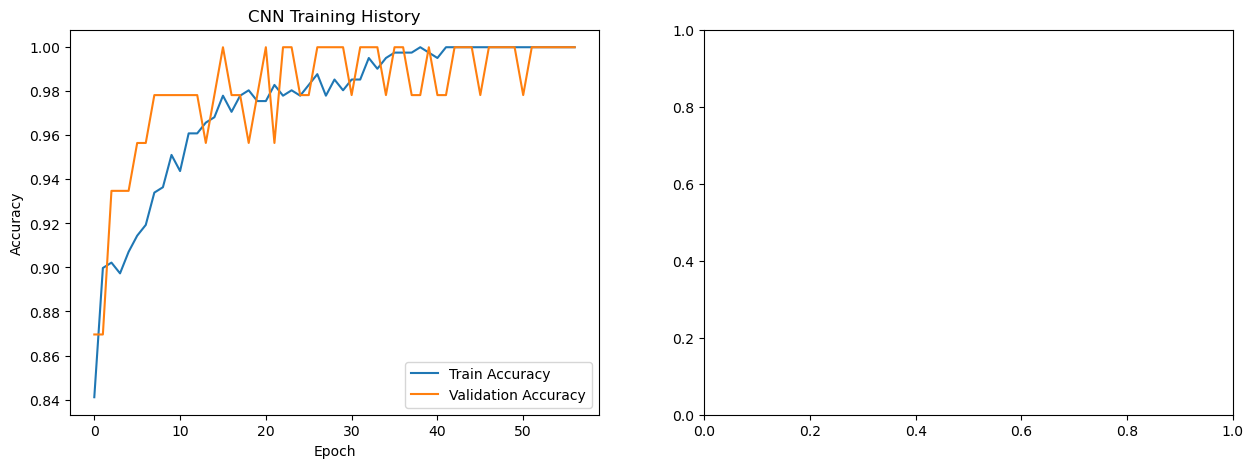

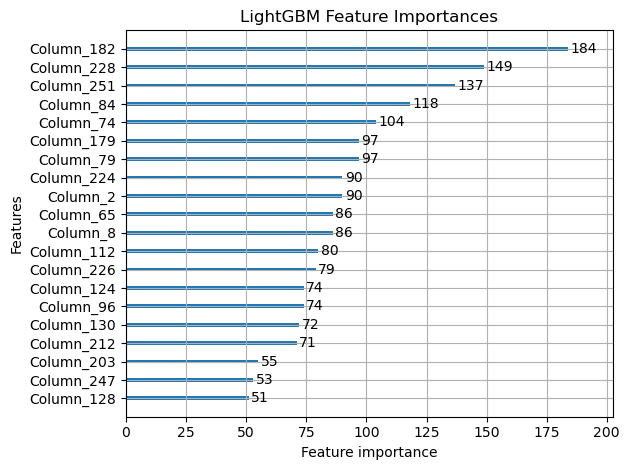

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# 1. Feature Selection using GOA (with minimum features constraint)
class BinaryGOA_FeatureSelection:
    def __init__(self, X_balanced, y_balanced, population_size=30, max_iter=50, min_features=5):
        self.X = np.array(X_balanced)
        self.y = np.array(y_balanced)
        self.population_size = population_size
        self.max_iter = max_iter
        self.min_features = min_features
        self.train_X, self.test_X, self.train_y, self.test_y = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )
        self.positions = np.random.randint(0, 2, (population_size, self.X.shape[1]))
        self.best_position = None
        self.best_fitness = -float('inf')
        
    def fitness_function(self, binary_mask):
        if np.sum(binary_mask) < self.min_features:
            return -1  # Penalize insufficient features
        selected_indices = np.where(binary_mask)[0]
        clf = KNeighborsClassifier(n_neighbors=5)
        clf.fit(self.train_X[:, selected_indices], self.train_y)
        pred = clf.predict(self.test_X[:, selected_indices])
        return accuracy_score(self.test_y, pred)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def optimize(self):
        for _ in range(self.max_iter):
            fitness = np.array([self.fitness_function(ind) for ind in self.positions])
            max_idx = np.argmax(fitness)
            if fitness[max_idx] > self.best_fitness:
                self.best_fitness = fitness[max_idx]
                self.best_position = self.positions[max_idx].copy()
            for i in range(self.population_size):
                if np.random.rand() < 0.5:
                    flip_mask = np.random.rand(self.X.shape[1]) < 0.1
                    self.positions[i] = np.logical_xor(self.positions[i], flip_mask).astype(int)
                else:
                    prob = self.sigmoid(np.random.randn(self.X.shape[1]))
                    self.positions[i] = (prob > 0.5).astype(int)
            for i in range(self.population_size):
                if np.sum(self.positions[i]) < self.min_features:
                    # Add random features to meet minimum
                    missing = self.min_features - np.sum(self.positions[i])
                    available = np.where(self.positions[i] == 0)[0]
                    if len(available) > 0:
                        to_add = np.random.choice(available, min(missing, len(available)), replace=False)
                        self.positions[i][to_add] = 1
        return self.best_position

# 2. Revised CNN Feature Extractor with Global Pooling
def create_cnn_feature_extractor(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # 1D Convolutional layers with padding
    x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
    
    # Global pooling instead of flattening
    x = GlobalMaxPooling1D()(x)
    
    # Intermediate feature representation
    features = Dense(256, activation='relu', name='features')(x)
    x = Dropout(0.5)(features)
    
    # Classification output
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    feature_extractor = Model(inputs, features)
    
    return model, feature_extractor

# 3. Hybrid Model Pipeline
def cnn_lightgbm_hybrid(X_balanced, y_balanced):
    # Preprocessing
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_balanced)
    y_encoded = y_balanced
    
    # Split dataset
    X_train_full, X_test, y_train_full, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=42
    )
    
    # Step 1: Feature Selection with GOA (minimum 5 features)
    print("Performing feature selection with GOA...")
    fs_goa = BinaryGOA_FeatureSelection(X_train_full, y_train_full, min_features=5)
    selected_mask = fs_goa.optimize()
    selected_features = np.where(selected_mask)[0]
    print(f"Selected {len(selected_features)} features: {selected_features}")
    
    # Apply feature selection
    X_train_selected = X_train_full[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    
    # Reshape data for CNN
    X_train_reshaped = X_train_selected.reshape((X_train_selected.shape[0], X_train_selected.shape[1], 1))
    X_test_reshaped = X_test_selected.reshape((X_test_selected.shape[0], X_test_selected.shape[1], 1))
    
    # Step 2: Train CNN Feature Extractor
    print("Training CNN feature extractor...")
    num_classes = len(np.unique(y_encoded))
    cnn_model, feature_extractor = create_cnn_feature_extractor(
        input_shape=(X_train_selected.shape[1], 1),
        num_classes=num_classes
    )
    
    cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    
    # Early stopping to prevent overfitting
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = cnn_model.fit(X_train_reshaped, y_train_full,
                            epochs=100,
                            batch_size=32,
                            validation_split=0.1,
                            callbacks=[early_stop],
                            verbose=1)
    
    # Step 3: Extract features using CNN
    print("Extracting features with CNN...")
    train_features = feature_extractor.predict(X_train_reshaped)
    test_features = feature_extractor.predict(X_test_reshaped)
    
    # Step 4: Train LightGBM on extracted features
    print("Training LightGBM classifier...")
    lgb_model = lgb.LGBMClassifier(
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=200,
        random_state=42
    )
    
    lgb_model.fit(train_features, y_train_full)
    
    # Step 5: Evaluate hybrid model
    y_pred = lgb_model.predict(test_features)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Hybrid Model Test Accuracy: {accuracy:.4f}")
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Plot training history
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('CNN Training History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    # Plot feature importance
    plt.subplot(1, 2, 2)
    lgb.plot_importance(lgb_model, max_num_features=20)
    plt.title('LightGBM Feature Importances')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'selected_features': selected_features,
        'cnn_model': cnn_model,
        'feature_extractor': feature_extractor,
        'lgb_model': lgb_model,
        'test_accuracy': accuracy
    }

# Example usage
if __name__ == "__main__":
    from sklearn.datasets import load_breast_cancer
    from sklearn.neighbors import KNeighborsClassifier
    
    # Load dataset with more features
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Run hybrid model pipeline
    results = cnn_lightgbm_hybrid(X, y)